In [43]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
corpus = Corpus.from_file('data/train.json')

In [3]:
corpus.build_vectors()
corpus.build_np_vecs()

In [4]:
from kmeans import Kmeans, Shower

In [41]:
np.random.seed(78)
limit = 6000
category_docs = [[] for _ in range(4)]
for i, doc in enumerate(corpus.docs[:limit]):
    category_docs[doc.int_category].append(i)
chosen_ones = []
real_labels = []
for i in range(4):
    chosen_ones.append(np.random.choice(category_docs[i], 50, replace=False))
chosen_ones = np.array(chosen_ones, dtype=np.int)
all_chosen_ones = chosen_ones.reshape((-1))
print(all_chosen_ones)
real_labels = np.array([doc.int_category for doc in corpus.docs[:limit]], dtype=np.int)

[3621 5976 5933 5591 2921  382 1081 4879 5999  875 3287 2388 2452 4030
 2548 4374 4301 5852 2694 4078 3468 4449 4982 1472 5027 4753 1664 4519
 4021 5130  386 4531 3000 5847 1336 5680 1542 1399 2212 4746  579   92
  645 3098 1307 4097 1379 1437 3400 3013 4539 3602 5089 4752  509 3650
 1492 5280 2268 4990 4268 4026 4548 3536 3344 2940 3329 1858 1491 1421
 1996 4245 4971 5953  796 2074 1070 1992 3322 3363 5602 5645 2340 3898
  674 1495  390 1229  491 2218 4504   50 4284 3437 3737 4797 1631 3880
 4286 1117 5837  415 4861 1608  295 2656 3024 2700 3643 1441 5934 4713
 1444 1772 1803 1748 1984 4563 3772 3703 2379 1026 1250 5558 3269  575
 4907 3819 4509 2038 4330  883 1435  260 2448  368 2067 3459 4408 5191
  357 1548  380 1084 1926 1849 3584 3963 2108 2506 2749 4858 4885 5921
   15 4742 3890  770  481 5607 5340 2292 3599 5747  280 3164 1805 5087
 2453 4043 3280 3937 3112  172 2359 2006 1623 4616 3660 3061 5015 2927
 1297 3048 4116 5161 5499 4385 2662 4482 3680 4820 2045 1877 1827 2565
 4491 

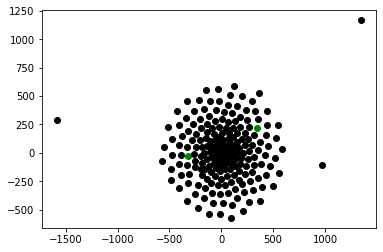

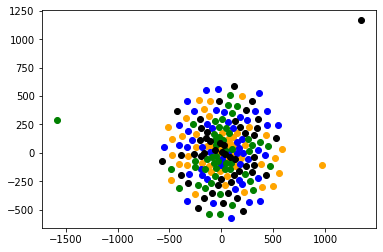

-6440746.098713296 23.190837144851685


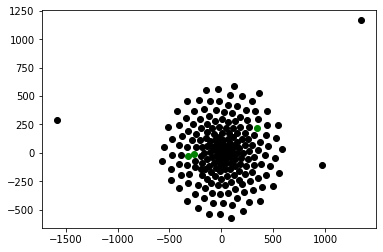

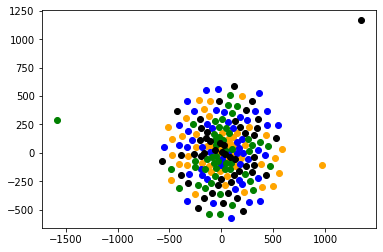

-565.4763858420774 20.83315086364746


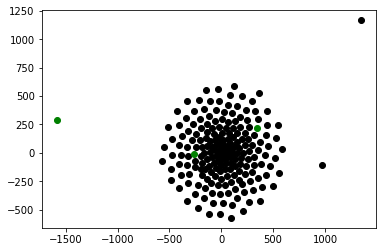

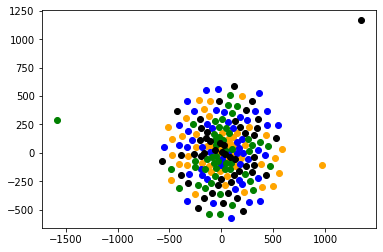

-402.3174242377281 21.45723605155945


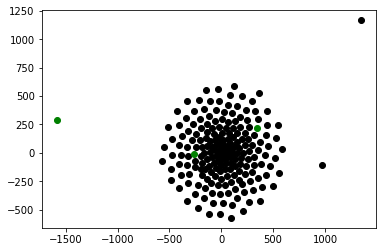

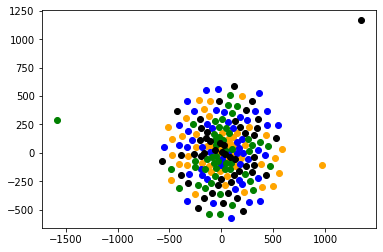

-342.6995072485879 24.454957962036133


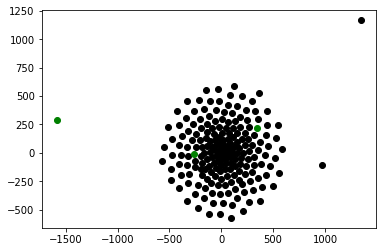

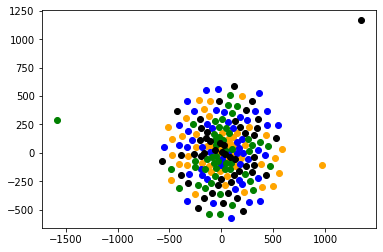

-1765.8967984262854 23.82468819618225


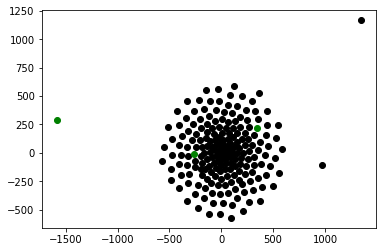

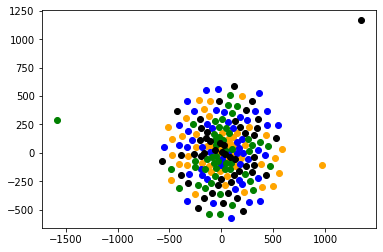

-1559.4877879237756 19.669405937194824


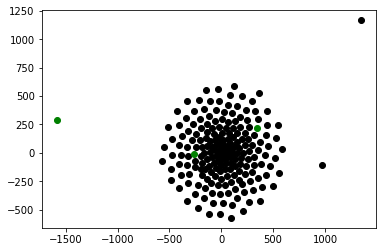

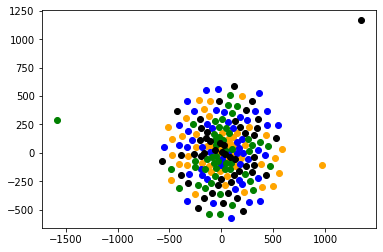

-853.9892628155649 22.20343804359436


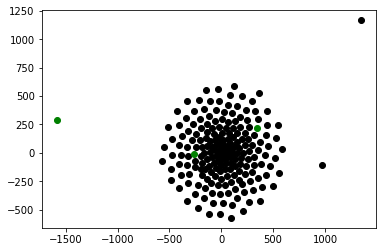

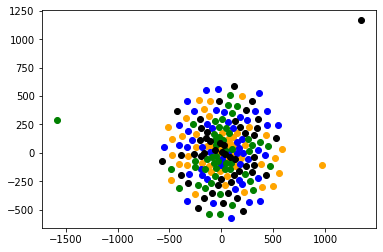

-531.7048853626475 22.54359722137451


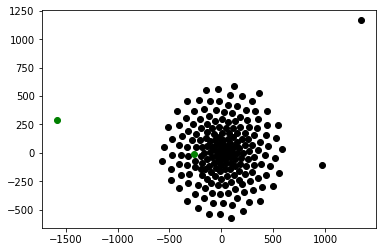

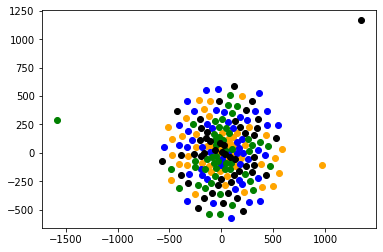

-606.9207944637164 22.053996086120605


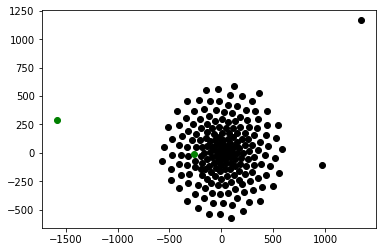

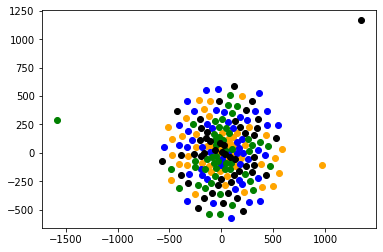

-25.586326053366065 25.42254900932312


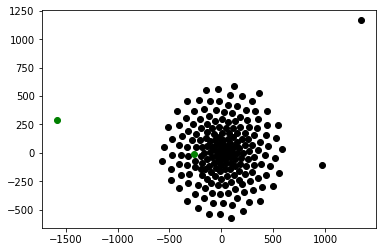

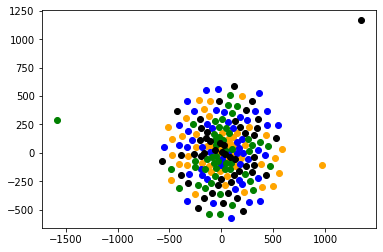

0.0 27.102999687194824


In [63]:
kmeans = Kmeans()
kmeans.set_vectors(corpus.np_vecs[:limit])
kmeans.set_random_centers(seed=80)

shower = Shower()
shower.set_vectors(corpus.np_vecs)
shower.set_indexes(all_chosen_ones)
shower.fit()
for i in range(30):
    t0 = time()
    shower.set_labels(kmeans.labels)
    shower.plot()
    plt.show()
    shower.set_labels(real_labels)
    shower.plot()
    plt.show()
    
    old_cost = kmeans.cost_function
    kmeans.one_iter()
    diff = kmeans.cost_function - old_cost
    t1 = time()
    
    print(diff, t1 - t0)
    if abs(diff) < 1:
        break

In [70]:
(kmeans.labels==3).sum()

5936

# Word2vec

In [4]:
from corpus import Corpus
import numpy as np
import matplotlib.pyplot as plt
from time import time
import gensim.models

In [5]:
corpus = Corpus.from_file('data/train.json')

In [61]:
sentences = corpus
model = gensim.models.Word2Vec(sentences=sentences, min_count=1, window=5, workers=4)

In [62]:
model.wv.vectors.shape

(56269, 100)

In [63]:
model.wv['MobileAccess']

array([-0.00938308,  0.06150335,  0.02081655, -0.00541671, -0.0086324 ,
       -0.00340729, -0.00592081,  0.0153461 , -0.01389699, -0.00973811,
        0.00738684,  0.02144098, -0.01011881, -0.02612566, -0.00536317,
       -0.00549446,  0.01778413,  0.00766507, -0.0157043 , -0.01416973,
        0.02357986, -0.03688978, -0.01796365, -0.01290965,  0.01217744,
        0.01329695,  0.00852376,  0.00845341, -0.00633368, -0.01051299,
       -0.03235797,  0.0044676 ,  0.02222244,  0.01104174,  0.00106082,
        0.00548598,  0.00708713, -0.01288181,  0.03377631, -0.02328742,
        0.01556893, -0.00452987,  0.01331524, -0.00700214, -0.02166608,
        0.01735408,  0.01970686, -0.02375644,  0.01309279,  0.00966026,
       -0.01042773,  0.02644677,  0.00884739, -0.02141533,  0.01693142,
        0.00757509, -0.00088242, -0.0043002 ,  0.01433143, -0.00035818,
        0.02283667,  0.02071424, -0.01044314,  0.0248576 ,  0.00613572,
       -0.00724007,  0.00602141,  0.00649868, -0.01592385,  0.00

In [64]:
def one_doc_to_vec(doc):
    return np.array(list(map(lambda i: model.wv[corpus.num_to_word[i]], doc.word_iterator))).mean(axis=0)
new_vecs = np.array(list(map(one_doc_to_vec, corpus.docs)))

In [65]:
new_vecs.shape

(24000, 100)

In [66]:
from kmeans import Shower

In [67]:
shower = Shower()
shower.set_vectors(new_vecs)
shower.set_indexes(all_chosen_ones)
shower.set_labels(real_labels)
shower.fit()

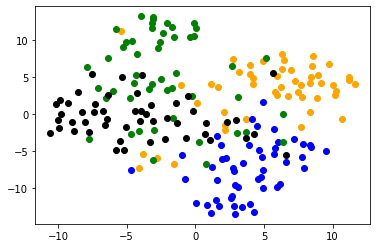

In [68]:
shower.plot()

In [70]:
from kmeans import Kmeans

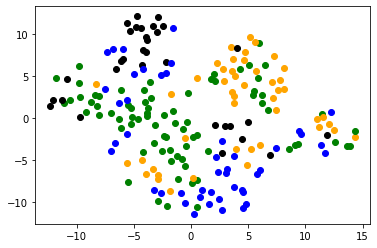

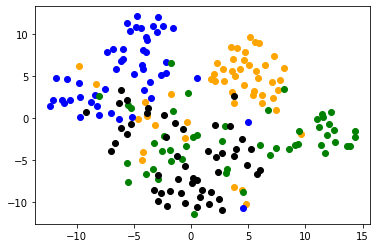

-6712.9375 1.8279988765716553


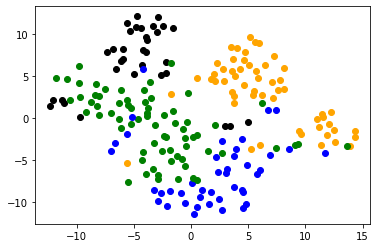

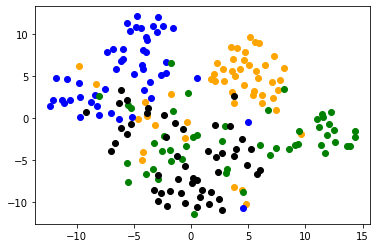

-1078.8545 2.4368786811828613


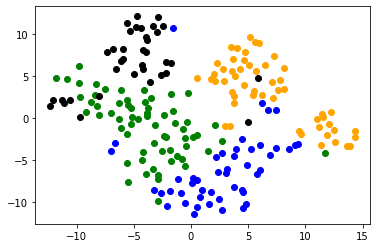

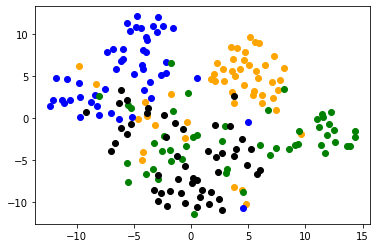

-343.02734 2.8577561378479004


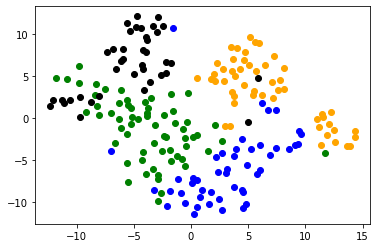

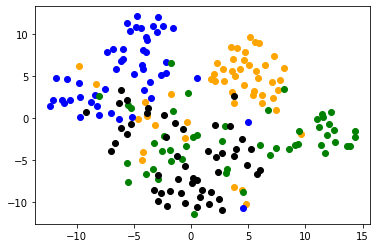

-115.43262 2.7086782455444336


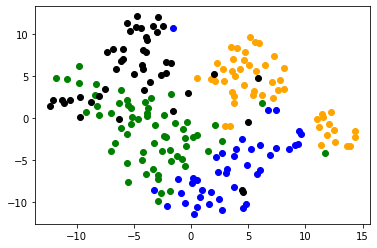

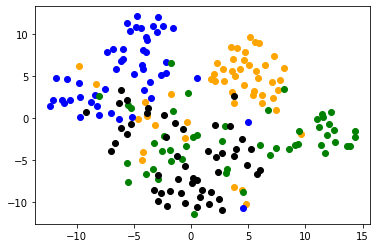

-59.910156 1.8112449645996094


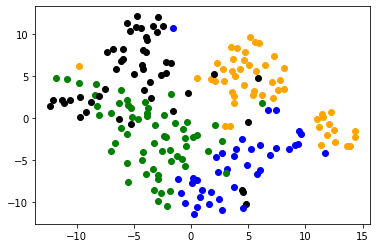

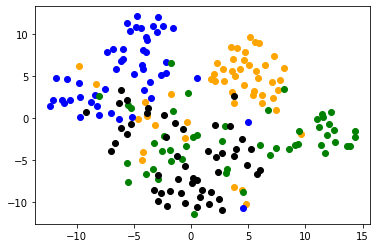

-41.25586 2.303173065185547


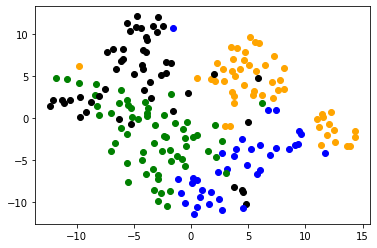

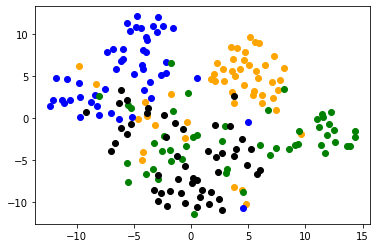

-23.46289 2.0549209117889404


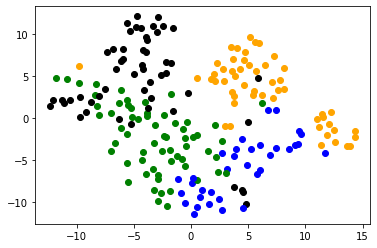

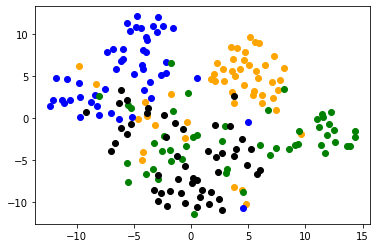

-17.003906 1.8242888450622559


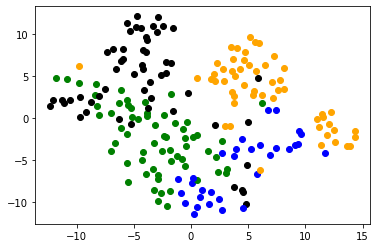

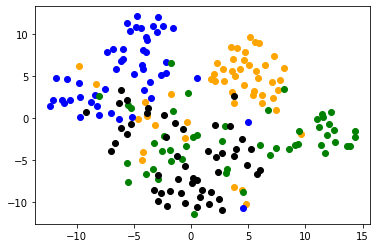

-8.310547 2.517235040664673


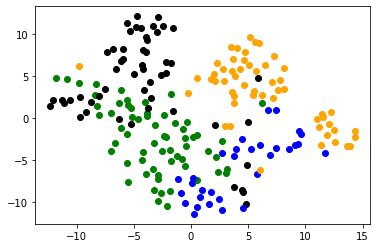

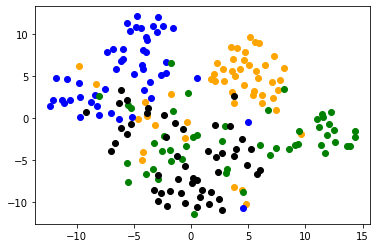

-3.5830078 1.9814231395721436


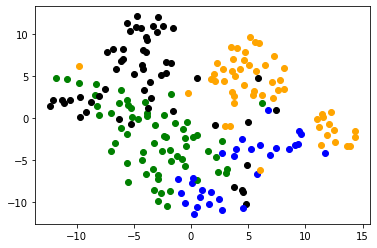

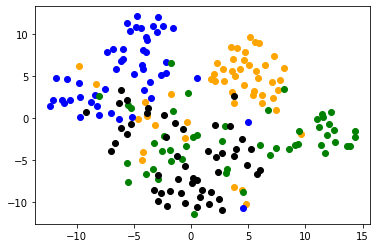

-3.272461 2.0775158405303955


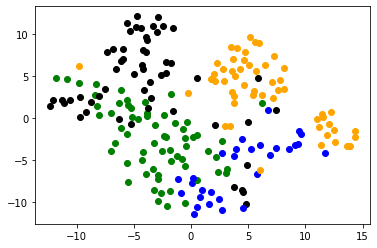

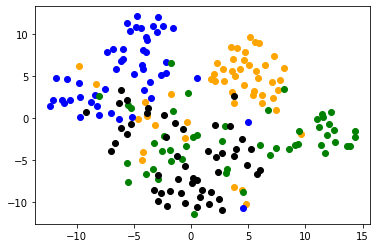

-2.1992188 2.177203893661499


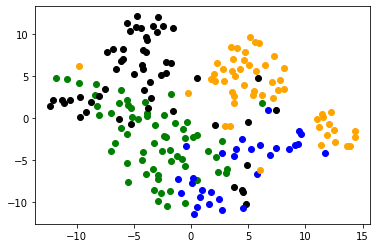

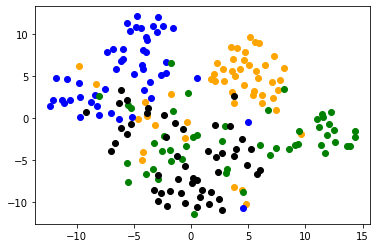

-0.875 2.302686929702759


In [72]:
limit=6000
kmeans = Kmeans()
kmeans.set_vectors(new_vecs[:limit])
kmeans.set_random_centers(seed=80)

shower = Shower()
shower.set_vectors(new_vecs[:limit])
shower.set_indexes(all_chosen_ones)
shower.fit()
for i in range(30):
    t0 = time()
    shower.set_labels(kmeans.labels)
    shower.plot()
    plt.show()
    shower.set_labels(real_labels)
    shower.plot()
    plt.show()
    
    old_cost = kmeans.cost_function
    kmeans.one_iter()
    diff = kmeans.cost_function - old_cost
    t1 = time()
    
    print(diff, t1 - t0)
    if abs(diff) < 1:
        break